In [192]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.signal
from scipy.io import wavfile

In [213]:
N = 48000
A = np.zeros(N)

wptr = 0
rptr = 0
ya_alt = 0

def set_delay(M):
    global rptr
    global wptr
    global N

    rptr = wptr - M
    while rptr < 0:
        rptr += N

def delay_line(x):
    global wptr
    global rptr
    global A
    global N
    global ya_alt

    g =  5 / 343
    
    y = 0
    A[wptr] = x
    wptr +=1
    
    rpi = math.floor(rptr)
    a = rptr - rpi
    y = a * A[np.mod(rpi + 1, N)] + (1-a) * A[rpi]
    # y = A[rptr]
    y = A[rpi] + (a) * (A[np.mod(rpi + 1, N)] - ya_alt)
    ya_alt = y
    frac = 1 - a
    y = A[rpi] * frac**3/6 + A[np.mod(rpi + 1, N)] * ((1 + frac)**3 - 4 * frac**3)/6 + A[np.mod(rpi + 2, N)] * ((2 - frac)**3 - 4 * (1 - frac)**3)/6 + A[np.mod(rpi + 3, N)] * (1-frac)**3/6
    
    rptr += (1 - g)
    
    if (rptr < 0):
        rptr += N
    if (rptr >= N):
        rptr -= (N)
    if (wptr >= N):
        wptr -= (N)
    
    print(A[wptr-1])
    return y, a

fs = 8000
f = 3000
t = np.arange(0,1,1/fs)
# t = np.linspace(0,1,10)
signal = np.sin(2 * np.pi * f * t)
y = np.zeros_like(signal)
a = np.zeros_like(signal)
set_delay(801)
for i in range(len(signal)):
    y[i], a[i] = delay_line(signal[i])


0.0
0.7071067811865476
-1.0
0.7071067811865474
3.6739403974420594e-16
-0.7071067811865472
1.0
-0.7071067811865477
-7.347880794884119e-16
0.7071067811865462
-1.0
0.7071067811865449
1.102182119232618e-15
-0.7071067811865465
1.0
-0.7071067811865472
-1.4695761589768238e-15
0.7071067811865492
-1.0
0.7071067811865444
-1.7157434800794711e-15
-0.707106781186547
1.0
-0.7071067811865467
-2.204364238465236e-15
0.7071067811865498
-1.0
0.7071067811865439
-9.809554005910593e-16
-0.7071067811865526
1.0
-0.7071067811865411
-2.9391523179536475e-15
0.7071067811865452
-1.0
0.7071067811865483
-7.351594678703649e-15
-0.7071067811865581
1.0
-0.7071067811865457
3.4314869601589423e-15
0.7071067811865508
-1.0
0.7071067811865529
1.469947547358777e-14
-0.7071067811865536
1.0
-0.7071067811865401
-4.408728476930472e-15
0.7071067811865464
-1.0
0.7071067811865474
-5.882018519726826e-15
-0.7071067811865591
1.0
-0.7071067811865346
1.9619108011821185e-15
0.7071067811865519
-1.0
0.7071067811865518
1.9581969173625882e-15

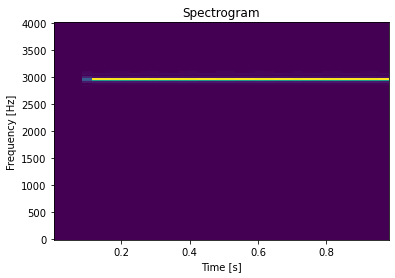

Text(0.5, 1.0, 'FFT Linear Interpolated Signal')

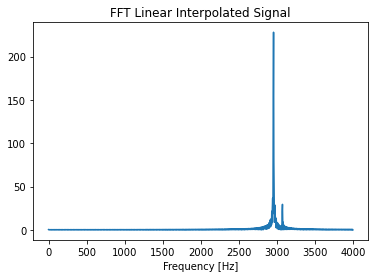

In [214]:
ff, tt, Sxx = scipy.signal.spectrogram(y, fs)
plt.pcolormesh(tt, ff, Sxx, shading = 'auto')
plt.title('Spectrogram')
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.show()

wavfile.write('prova.wav', fs, y)

# FFT of signals
Nfft = 2048
f_axis = np.linspace(0, fs / 2, int(Nfft / 2 + 1))
fft_y = np.fft.fft(y, Nfft)
plt.plot(f_axis, abs(fft_y[:int(Nfft/2 + 1)]))
plt.xlabel('Frequency [Hz]')
plt.title('FFT Linear Interpolated Signal')
# plt.xlim([2400,2600])


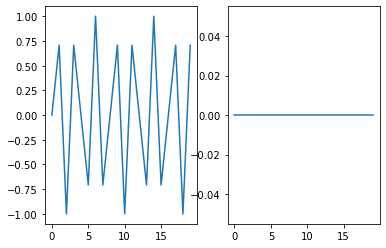

In [215]:
plt.figure()
plt.subplot(1,2,1)
plt.plot(signal[0:20])

plt.subplot(1,2,2)
plt.plot(y[0:20])


In [158]:
print(a[0:20])

[0.01457726 0.02915452 0.04373178 0.05830904 0.0728863  0.08746356
 0.10204082 0.11661808 0.13119534 0.14577259 0.16034985 0.17492711
 0.18950437 0.20408163 0.21865889 0.23323615 0.24781341 0.26239067
 0.27696793 0.29154519]


In [161]:
y[789]

0.4767541623459051

In [137]:
print(y[812:820])

[ 0.13736984  0.70514668 -0.66832731 -0.23756214  0.87503444 -0.40727529
 -0.60725048  0.88078311]


In [138]:
A[0:20]

array([ 0.00000000e+00,  9.23879533e-01, -7.07106781e-01, -3.82683432e-01,
        1.00000000e+00, -3.82683432e-01, -7.07106781e-01,  9.23879533e-01,
        6.12323400e-16, -9.23879533e-01,  7.07106781e-01,  3.82683432e-01,
       -1.00000000e+00,  3.82683432e-01,  7.07106781e-01, -9.23879533e-01,
       -1.22464680e-15,  9.23879533e-01, -7.07106781e-01, -3.82683432e-01])

## Test 2


In [212]:
N = 10
A = np.zeros(N)

wptr = 0
rptr = 0
ya_alt = 0

def set_delay(M):
    global rptr
    global wptr
    global N

    rptr = wptr - M
    while rptr < 0:
        rptr += N

def delay_line(x):
    global wptr
    global rptr
    global A
    global N
    global ya_alt

    g =  -5 / 343
    
    y = 0
    A[wptr] = x
    wptr +=1
    
    rpi = math.floor(rptr)
    a = rptr - rpi
    y = a * A[np.mod(rpi + 1, N)] + (1-a) * A[rpi]
    # y = A[rptr]
    y = A[rpi] + (a) * (A[np.mod(rpi + 1, N)] - ya_alt)
    ya_alt = y
    # frac = 1 - a
    # y = A[rpi] * frac**3/6 + A[np.mod(rpi + 1, N)] * ((1 + frac)**3 - 4 * frac**3)/6 + A[np.mod(rpi + 2, N)] * ((2 - frac)**3 - 4 * (1 - frac)**3)/6 + A[np.mod(rpi + 3, N)] * (1-frac)**3/6
    
    rptr = wptr - 1.3
    
    if (rptr < 0):
        rptr += N
    if (rptr >= N):
        rptr -= (N)
    if (wptr >= N):
        wptr -= (N)
    
    return y, a


signal = np.ones(15)

y = np.zeros_like(signal)
a = np.zeros_like(signal)
set_delay(1)
for i in range(len(signal)):
    # print(rptr)
    y[i], a[i] = delay_line(signal[i])
    print(y[i])

0.0
0.6999999999999993
1.2100000000000004
0.8529999999999998
1.1029000000000002
0.9279699999999999
1.050421
0.9647053
1.02470629
0.982705597
1.0121060820999999
0.9915257425300001
1.0059319802289999
0.9958476138397001
1.00290667031221


In [205]:
a

array([0. , 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7,
       0.7, 0.7])